# **Time Series Analysis – Daily Delhi Climate Dataset**

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
df = pd.read_csv("C:/Users/USER/Downloads/DailyDelhiClimateTest.csv")

In [51]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [52]:
df = df.rename(columns={'meantemp': 'mean_temp', 'meanpressure': 'mean_pressure'})

In [53]:
df.head()

,date,mean_temp,humidity,wind_speed,mean_pressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [54]:
df.tail()

,date,mean_temp,humidity,wind_speed,mean_pressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           114 non-null    object 
 1   mean_temp      114 non-null    float64
 2   humidity       114 non-null    float64
 3   wind_speed     114 non-null    float64
 4   mean_pressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [56]:
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)

In [57]:
df.head()

,mean_temp,humidity,wind_speed,mean_pressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_temp      114 non-null    float64
 1   humidity       114 non-null    float64
 2   wind_speed     114 non-null    float64
 3   mean_pressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB


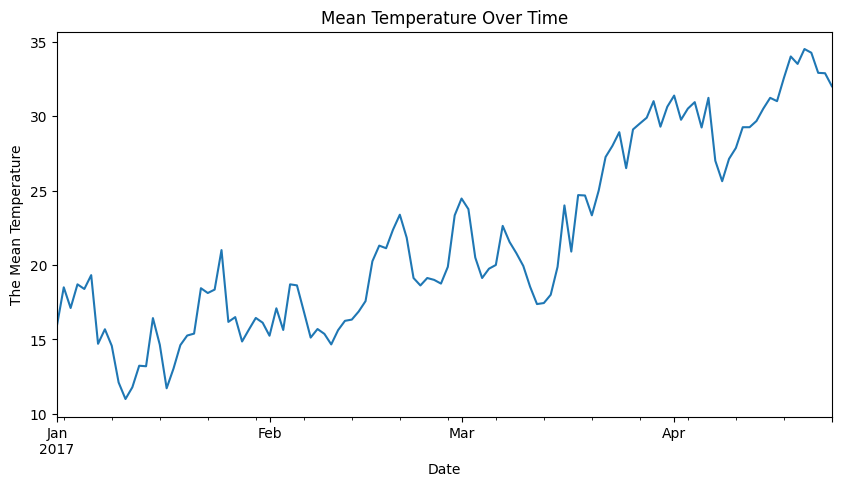

In [59]:
df['mean_temp'].plot(title="Mean Temperature Over Time", figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("The Mean Temperature")
plt.show()

### As the year passby there were seasonal component in the time series. There were period where the temperature increased due to increased sun shine and other factors while, there were time that there were reduction in temperature due to cold weather e.g during raining season.

### Plotting to see a clear tend and seasonality

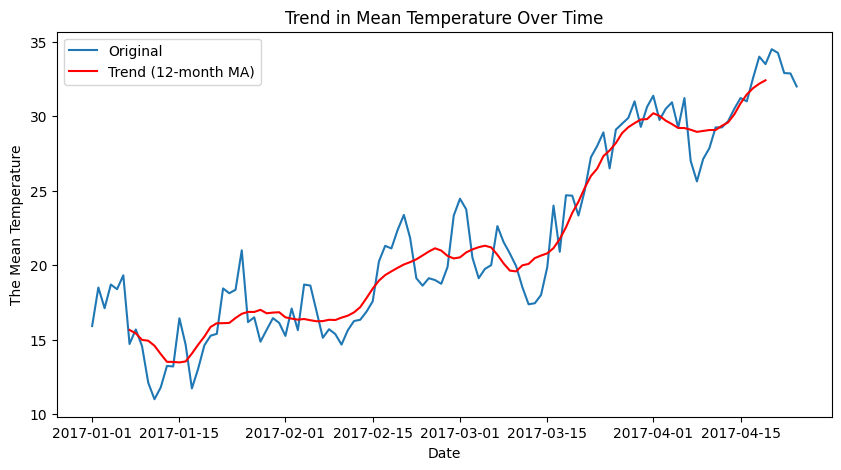

In [60]:
df['Trend'] = df['mean_temp'].rolling(window=12, center=True).mean()

plt.figure(figsize=(10,5))
plt.plot(df['mean_temp'], label='Original')
plt.plot(df['Trend'], label='Trend (12-month MA)', color='red')
plt.title("Trend in Mean Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("The Mean Temperature")
plt.legend()
plt.show()

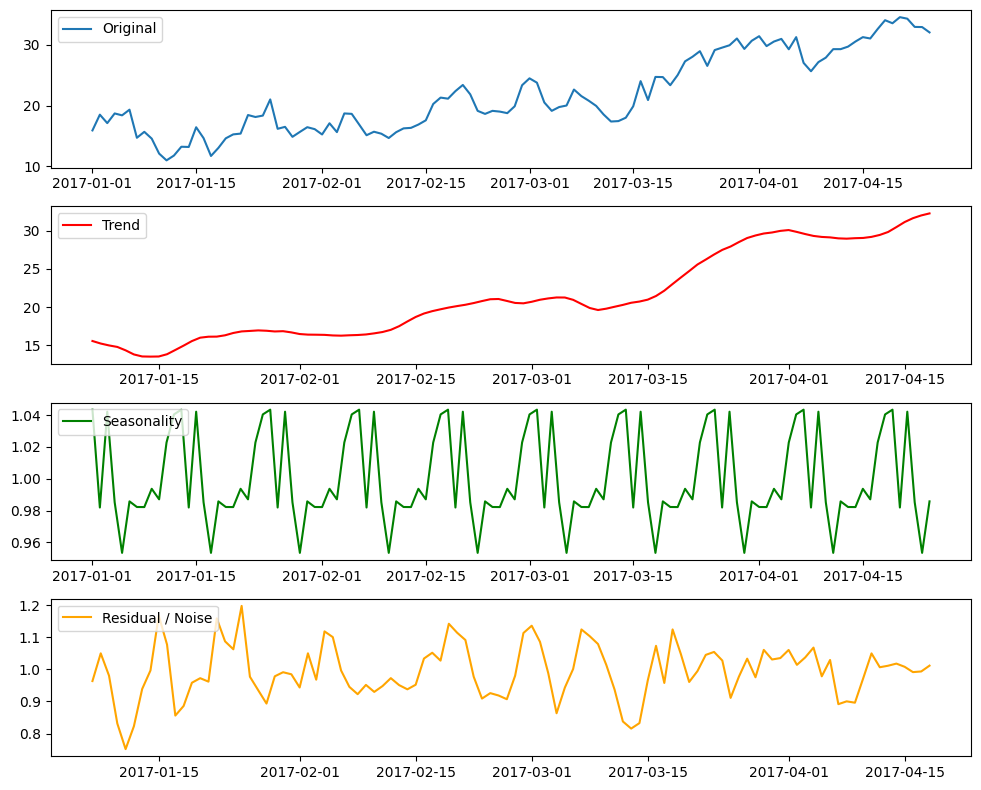

In [61]:
decomposition = seasonal_decompose(df['mean_temp'], model='multiplicative', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(df['mean_temp'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(4,1,4)
plt.plot(residual, label='Residual / Noise', color='orange')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Residual/Noise is a component of time series

## Checking for Stationarity (ADF Test)

In [62]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['mean_temp'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The series is likely stationary")
else:
    print("The series is likely non-stationary")


ADF Statistic: -1.096474275875619
p-value: 0.7164758731775932
The series is likely non-stationary


##### It show that the series is non-stationary however, ARIMA requires stationary series; thus, there is need to transform it into stationary.

In [63]:
print(result)

(np.float64(-1.096474275875619), np.float64(0.7164758731775932), 0, 113, {'1%': np.float64(-3.489589552580676), '5%': np.float64(-2.887477210140433), '10%': np.float64(-2.580604145195395)}, np.float64(386.6781886302757))


## Differencing (Since, it is Not Stationary)

#### Reason: This will remove trend to achieve stationarity.

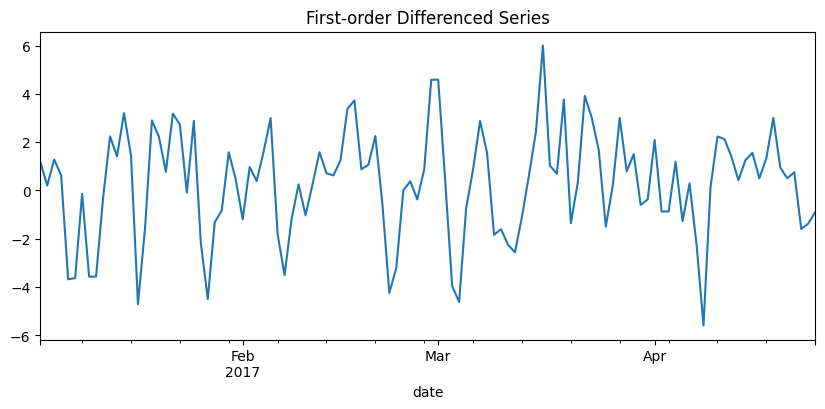

In [64]:
df['Diff_1'] = df['mean_temp'] - df['mean_temp'].shift(2)

#Drop missing values
df_diff = df['Diff_1'].dropna()

df_diff.plot(title="First-order Differenced Series", figsize=(10,4))
plt.show()

### Re-testing stationarity

In [65]:
result_diff = adfuller(df_diff)

print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
if result_diff[1] < 0.05:
    print("The series is likely stationary")
else:
    print("The series is likely non-stationary")

ADF Statistic: -4.502543452023836
p-value: 0.0001945694625215768
The series is likely stationary


**No need for seasonal difference here!**

## ARIMA MODEL

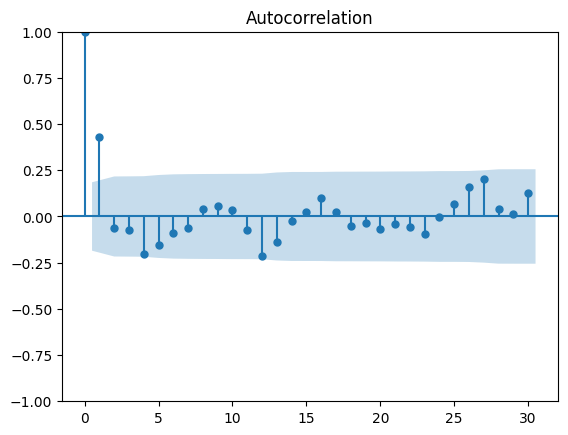

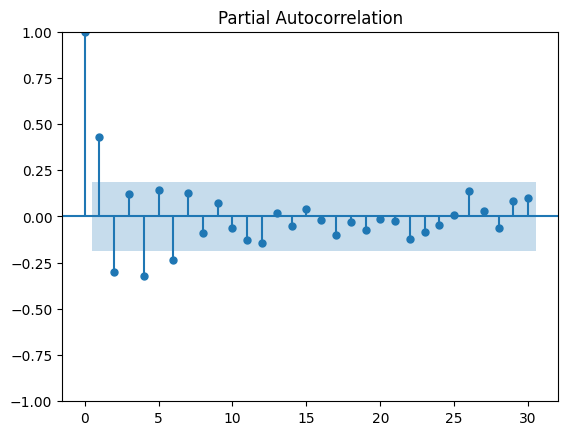

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_diff, lags=30)
plt.show()

plot_pacf(df_diff, lags=30)
plt.show()

In [67]:
train_size = int(len(df) * 0.8)

train = df['mean_temp'][:train_size]
test = df['mean_temp'][train_size:]

In [68]:
train.tail()

date
2017-03-28    29.888889
2017-03-29    31.000000
2017-03-30    29.285714
2017-03-31    30.625000
2017-04-01    31.375000
Name: mean_temp, dtype: float64

In [69]:
test.head()

date
2017-04-02    29.750000
2017-04-03    30.500000
2017-04-04    30.933333
2017-04-05    29.230769
2017-04-06    31.222222
Name: mean_temp, dtype: float64

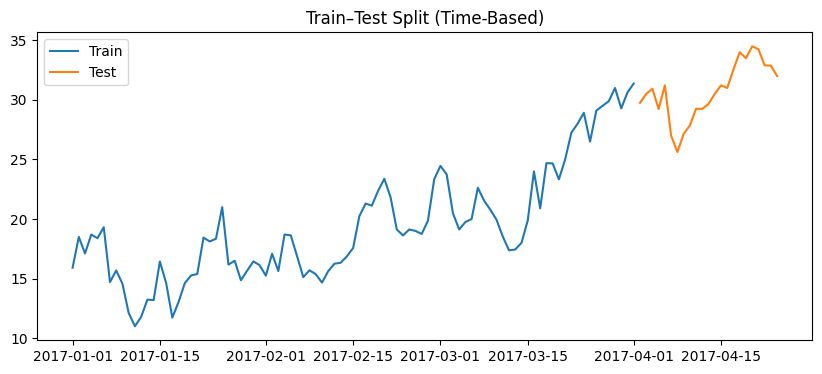

In [70]:
plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.legend()
plt.title("Train–Test Split (Time-Based)")
plt.show()

In [71]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

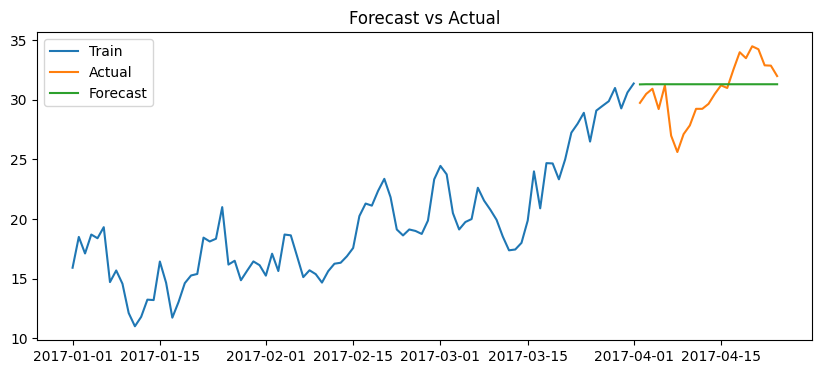

In [72]:
forecast_1 = fitted_model.forecast(steps=len(test))

plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast_1, label='Forecast')
plt.legend()
plt.title("Forecast vs Actual")
plt.show()

## Residual Diagnostics


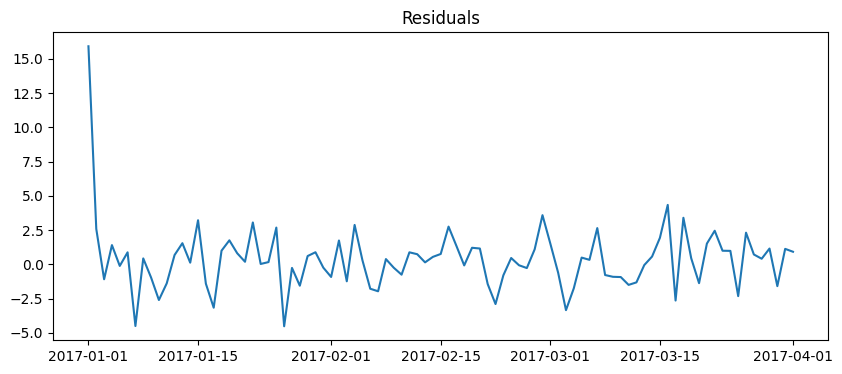

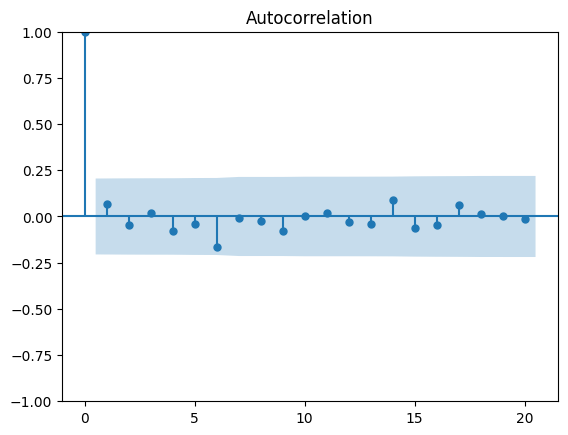

In [79]:
residuals = fitted_model.resid

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals")
plt.show()

plot_acf(residuals)
plt.show()

### **residuals show no pattern → Hence, the model is adequate.**

### Automatic Parameter Selection

### Reason: Avoid manual trial-and-error

In [80]:

import itertools

p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))

best_aic = float("inf")
best_order = None

for order in pdq:
    try:
        model = ARIMA(train, order=order)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

print("Best ARIMA Order:", best_order)


Best ARIMA Order: (0, 1, 0)
